COMP 4353 Data Mining  
Final Homework Assignment  
- Geraldo Braho
- Student ID: 120302835
- 5/3/2017  

# <center> Global Terrorism Database</center>

### Problem

This dataset contains check-ins in NYC and Tokyo collected for about 10 month (from 12 April 2012 to 16 February 2013). It contains 227,428 check-ins in New York city and 573,703 check-ins in Tokyo. Each check-in is associated with its time stamp, its GPS coordinates and its semantic meaning (represented by fine-grained venue-categories). This dataset is originally used for studying the spatial-temporal regularity of user activity in LBSNs.

# Table Of Content 

### Step 1 - Data Information
### Step 2 - Descriptive Statistics
### Step 3 - Analysis of the output column
### Step 4 - Box Plot
### Step 5 - Distribution of Columns
### Step 6 - Pairwise plot
### Step 7 - Cross-Correlation of Input Columns
### Step 8 - Identify Correlated Columns
### Step 9 - Cross-Correlation Heatmap
### Step 10 - Output versus Input Plot




# 1

Generating the information about the dataset: 
* number of columns and rows, 
* names and data types of the columns, 
* memory usage of the dataset.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
# reading the data from my file
dataSet=pd.read_csv("GeraldoBrahodataset_TSMC2014_NYC.csv")


In [23]:
# checking the data and returning first n rows
dataSet.head(10)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,-240,Tue Apr 03 18:04:38 +0000 2012
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,-240,Tue Apr 03 18:04:42 +0000 2012
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,-240,Tue Apr 03 18:06:18 +0000 2012
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,-240,Tue Apr 03 18:06:19 +0000 2012


In [24]:
# Using dataset info to display information about the dataset.
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227428 entries, 0 to 227427
Data columns (total 8 columns):
userId             227428 non-null int64
venueId            227428 non-null object
venueCategoryId    227428 non-null object
venueCategory      227428 non-null object
latitude           227428 non-null float64
longitude          227428 non-null float64
timezoneOffset     227428 non-null int64
utcTimestamp       227428 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 13.9+ MB


# 2

Generating descriptive statistics of all columns (input and output) of the dataset.

Descriptive statistics for numerical columns include: 
* count, 
* mean, 
* std, 
* min, 
* 25 percentile (Q1), 
* 50 percentile (Q2, median), 
* 75 percentile (Q3), 
* max values of the columns. 

In [25]:
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
numericalData = dataSet.describe();
numericalData.columns = ['latitude', 'longitude', 'timezoneOffset', 'utcTimestamp'];
numericalData

,latitude,longitude,timezoneOffset,utcTimestamp
count,227428.000000,227428.000000,227428.000000,227428.000000
mean,535.304817,40.754045,-73.974556,-253.392019
std,305.398774,0.072458,0.086209,43.234750
min,1.000000,40.550852,-74.274766,-420.000000
25%,287.000000,40.718330,-74.000633,-240.000000
50%,523.000000,40.747745,-73.983479,-240.000000
75%,793.000000,40.778374,-73.945709,-240.000000
max,1083.000000,40.988332,-73.683825,660.000000


In [26]:
# extract categorical data (in case there is any)
# save it into new dataframe named categoricalData
# categoricalData = dataSet.select_dtypes(include=['object']).copy();
# categoricalData

In [27]:
# # determine distinct values in each column
# uniq = []
# for i in categoricalData:
#     uniq.append(categoricalData[i].unique())

# uniq




In [28]:
# # determine frequencies of the distinct values in each column
# freq = []
# for i in categoricalData:
#     freq.append(categoricalData[i].value_counts())
# freq

# 3


In [29]:
# Calculating inter quartile range, Q3-Q1
IQR_value = numericalData.utcTimestamp.quantile(0.75) - numericalData.utcTimestamp.quantile(0.25);
IQR_value

440.7740669623248

In [30]:
# Calculating the range (difference between max and min value)
range_value = numericalData.utcTimestamp.max() - numericalData.utcTimestamp.min();
range_value

227848.0

# 4


Box plots of all numerical columns

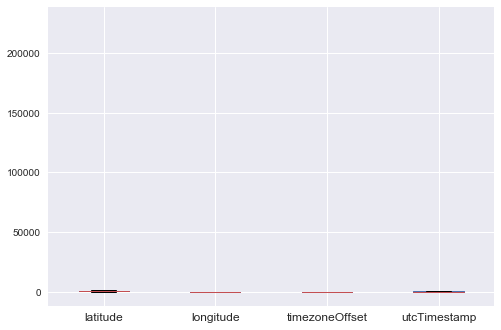

In [31]:
#  boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles
numericalData.boxplot()



Pie plots for all categorical columns

In [32]:
# pie plots for categorical data (if any)
#categoricalData.plot.pie(subplots=True, figsize=(50, 10))

# 5

Histogram of all numerical columns

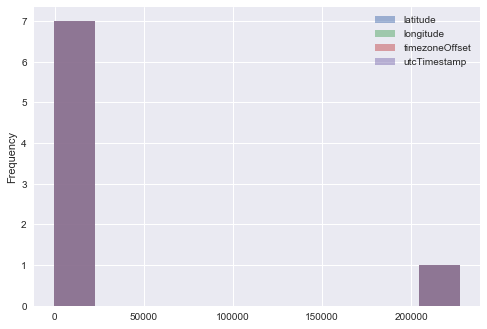

In [33]:
# Histograms are a type of bar plot for numeric data that group the data into bins. After you create a histogram object, you can modify aspects of the histogram by changing its property values. This is particularly useful for quickly modifying the properties of the bins or changing the display.
numericalData.plot.hist(alpha=0.5)

# 6

Pairwise scatter plot of all numerical input and output columns

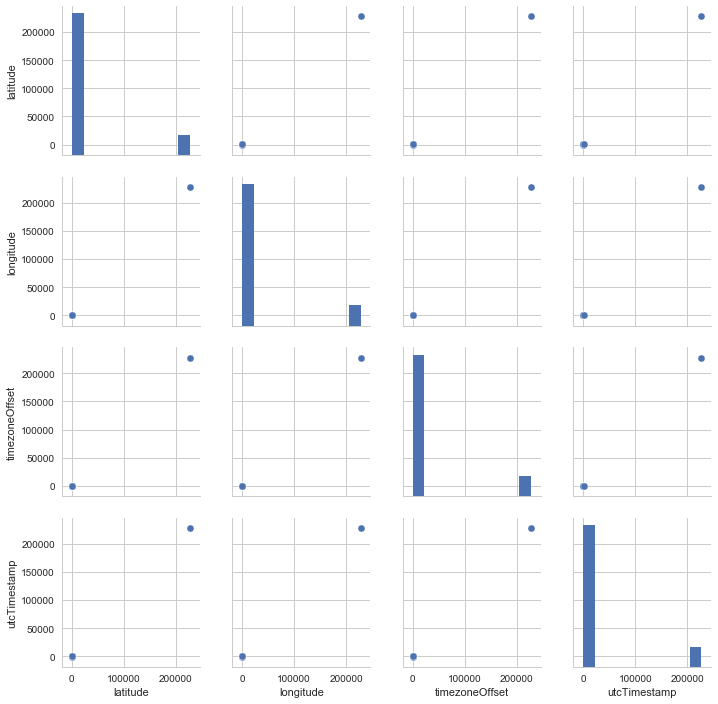

In [34]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
sns.pairplot(numericalData)


# 7

Cross-correlation matrix for input columns using pearson correlation coefficient



In [29]:
numericalData.corr(method = 'pearson')

,latitude,longitude,timezoneOffset,utcTimestamp
latitude,1.000000,0.999992,0.999991,0.999995
longitude,0.999992,1.000000,1.000000,0.999991
timezoneOffset,0.999991,1.000000,1.000000,0.999992
utcTimestamp,0.999995,0.999991,0.999992,1.000000


# 8

Those input columns with pearson coefficient greater than or equal to 0.8

In [30]:
numericalData.corr(method = 'pearson') >= 0.8

,latitude,longitude,timezoneOffset,utcTimestamp
latitude,True,True,True,True
longitude,True,True,True,True
timezoneOffset,True,True,True,True
utcTimestamp,True,True,True,True


# 9

Heatmap plot for cross-correlation matrix of input column

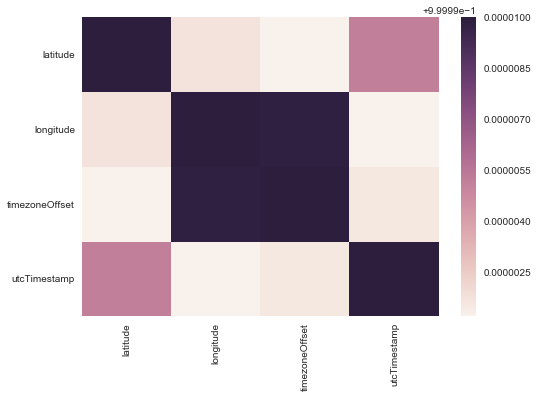

In [32]:
ax = sns.heatmap(numericalData.corr(method = 'pearson').T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    
plt.show()

# 10

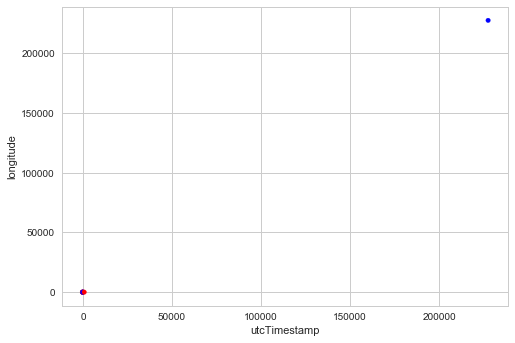

In [33]:
numericalData.plot.scatter(x='utcTimestamp', y='longitude', c=['b','r'])